# Characterize DE lncRNAs gene expression patterns (bar graphs)

## <br> 1. Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
from matplotlib_venn import venn2
from sklearn.cluster import KMeans
import warnings

In [2]:
import os

# Directory name
figures_dir = "Figures"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"Directory '{figures_dir}' created.")
else:
    print(f"Directory '{figures_dir}' already exists.")


Directory 'Figures' already exists.


## <br> 2. Import Data

In [3]:
Mouse_Master = pd.read_csv('../02_Mouse_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Bulk_Mouse_with_Mouse_MGI.txt',
                                              delimiter = '\t',
                                              index_col=0)



Mouse_Master['Dose'] = Mouse_Master['Dose'].apply(lambda x: '{:.2g}'.format(x)).astype('category')

# Specify the desired order for the Dose levels
dose_order = ['0.03', '0.1', '0.3', '1', '3', '10', '30']

# Convert 'Dose' column to a categorical type with the specified order
Mouse_Master['Dose'] = pd.Categorical(Mouse_Master['Dose'], categories=dose_order, ordered=True)

Mouse_Master

/tmp/local/51388227/ipykernel_2230463/1610497500.py:1: DtypeWarning: Columns (18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  Mouse_Master = pd.read_csv('../02_Mouse_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Bulk_Mouse_with_Mouse_MGI.txt',


,Gene,MGI_Symbol,Dose,pDRE,AHR,Type,baseMean,Log2FC,Fold-Change,lfcSE,...,padj,chrom,start,end,frame,score,strand,gene_id,transcript_id,NR_annotation
0,lnc100,.,0.03,1,0,lncRNA,0.738981,0.862954,1.818759,2.429333,...,NaN,chr1,21246734,21250265,.,1000,+,lnc_inter_chr1_100,lnc_inter_chr1_100,lnc100
1,lnc1000,Gm32128,0.03,0,8,lncRNA,0.821042,0.929693,1.904871,1.989028,...,NaN,chr1,191152395,191156841,.,1000,+,lnc_inter_chr1_1000,lnc_inter_chr1_1000,lnc1000
2,lnc10003,Gm51875,0.03,0,0,lncRNA,0.300701,0.000000,1.000000,5.656128,...,NaN,chr11,94897782,94903363,.,1000,-,lnc_as_chr11_10003,lnc_as_chr11_10003,lnc10003
3,lnc10003,Gm36385,0.03,0,0,lncRNA,0.300701,0.000000,1.000000,5.656128,...,NaN,chr11,94897782,94903363,.,1000,-,lnc_as_chr11_10003,lnc_as_chr11_10003,lnc10003
4,lnc10004,Dlx4os,0.03,1,0,lncRNA,2.027109,0.000000,1.000000,1.904898,...,1.000000e+00,chr11,95035841,95050060,.,1000,+,lnc_as_chr11_10004,lnc_as_chr11_10004,lnc10004_Dlx4os
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365969,mt-Nd4l,.,30,0,0,mitochondrial protein-coding gene,28.894681,-0.353649,0.782602,0.350916,...,4.619477e-01,chrM,9876,10173,.,.,+,ENSMUSG00000065947,ENSMUSG00000065947,NaN
365970,mt-Nd4,.,30,0,0,mitochondrial protein-coding gene,98368.928940,-0.549831,0.683100,0.082421,...,2.695554e-10,chrM,10166,11544,.,.,+,ENSMUSG00000064363,ENSMUSG00000064363,NaN
365971,mt-Nd5,.,30,0,0,mitochondrial protein-coding gene,67723.157378,-0.101532,0.932043,0.100825,...,4.622247e-01,chrM,11741,13565,.,.,+,ENSMUSG00000064367,ENSMUSG00000064367,NaN
365972,mt-Nd6,.,30,0,0,mitochondrial protein-coding gene,19830.183491,0.154663,1.113162,0.185883,...,5.561182e-01,chrM,13551,14070,.,.,-,ENSMUSG00000064368,ENSMUSG00000064368,NaN


In [4]:
Rat_Master = pd.read_csv('../03_Rat_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Rat_with_Mouse_MGI.txt',
                                              delimiter = '\t',
                                              index_col=0)

Rat_Master['Dose'] = Rat_Master['Dose'].apply(lambda x: '{:.2g}'.format(x)).astype('category')

# Specify the desired order for the Dose levels
dose_order = ['0.01','0.03', '0.1', '0.3', '1', '3', '10']

# Convert 'Dose' column to a categorical type with the specified order
Rat_Master['Dose'] = pd.Categorical(Rat_Master['Dose'], categories=dose_order, ordered=True)

Rat_Master

,Gene,Dose,pDRE,AHR,transcript_type,baseMean,Log2FC,Fold-Change,lfcSE,stat,pvalue,padj,source
0,lnc1000,0.01,0,1,lncRNA,1.021823,-0.020692,0.985760,1.991121,-0.010392,9.917083e-01,NaN,liftover
1,lnc10000,0.01,1,0,lncRNA,0.046372,-0.929325,0.525104,6.005823,-0.154737,8.770284e-01,NaN,liftover
2,lnc10001,0.01,0,0,lncRNA,0.146825,0.000000,1.000000,6.005823,0.000000,1.000000e+00,NaN,liftover
3,lnc10003,0.01,2,0,lncRNA,0.177874,0.032402,1.022714,6.005823,0.005395,9.956953e-01,NaN,liftover
4,lnc10004,0.01,7,1,lncRNA,0.740087,0.000000,1.000000,3.592880,0.000000,1.000000e+00,NaN,liftover
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722234,LOC120099597,10,1,0,predicted_lncRNA,0.092333,-1.398142,0.379417,6.005823,-0.232798,8.159184e-01,NaN,ncbiRefSeq
7722237,Dkc1,10,0,2,mRNA,277.395024,1.901728,3.736606,0.248099,7.665213,1.785343e-14,1.705286e-12,ncbiRefSeq
7722252,LOC103694537,10,0,0,predicted_mRNA,17.353741,0.172073,1.126676,0.466195,0.369101,7.120523e-01,8.501281e-01,ncbiRefSeq
7722264,LOC120099632,10,0,0,predicted_mRNA,0.048942,0.000000,1.000000,6.005823,0.000000,1.000000e+00,NaN,ncbiRefSeq


## <br> 3a. Determine DE lncRNAs in Mouse vs Rat Bulk RNAseq

In [5]:
Mouse_Master_lncRNA = Mouse_Master[(Mouse_Master['Type']== 'lncRNA') |
                                     (Mouse_Master['Type']== 'antisense') |
                                     (Mouse_Master['Type']== 'lincRNA') |
                                     (Mouse_Master['Type']== 'NR') |
                                     (Mouse_Master['Type']== 'lncOfInterest')]

Mouse_Master_lncRNA_DEGs = Mouse_Master_lncRNA[((Mouse_Master_lncRNA['Fold-Change'] >= 1.5) | 
                                                 (Mouse_Master_lncRNA['Fold-Change'] <= 1/1.5)) &
                                                 (Mouse_Master_lncRNA['padj'] <= 0.05)]

Mouse_Master_lncRNA_DEGs['Dose'] = Mouse_Master_lncRNA_DEGs['Dose'].astype(str)


# Number of unique 'Gene' values for each DataFrame
num_unique_genes_lncRNA = Mouse_Master_lncRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = Mouse_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("Mouse RNAseq")
print("Total lncRNAs:", num_unique_genes_lncRNA)
print("Total DE lncRNAs:", num_unique_genes_DEGs)

# List of unique 'Genes'  for each DataFrame
Mouse_DE_lncRNA_list = Mouse_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first')
Mouse_DE_lncRNA_30 = Mouse_Master_lncRNA_DEGs[Mouse_Master_lncRNA_DEGs['Dose'] == '30']

Mouse RNAseq
Total lncRNAs: 29240
Total DE lncRNAs: 2386


/tmp/local/51388227/ipykernel_2230463/4100394685.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mouse_Master_lncRNA_DEGs['Dose'] = Mouse_Master_lncRNA_DEGs['Dose'].astype(str)


In [6]:
Rat_Master_lncRNA = Rat_Master[(Rat_Master['transcript_type']== 'lncRNA')]

Rat_Master_lncRNA_DEGs = Rat_Master_lncRNA[((Rat_Master_lncRNA['Fold-Change'] >= 1.5) | 
                                                 (Rat_Master_lncRNA['Fold-Change'] <= 1/1.5)) &
                                                 (Rat_Master_lncRNA['padj'] <= 0.05)]

Rat_Master_lncRNA_DEGs['Dose'] = Rat_Master_lncRNA_DEGs['Dose'].astype(str)


# Number of unique 'Gene' values for each DataFrame
num_unique_genes_lncRNA = Rat_Master_lncRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = Rat_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("Rat RNAseq")
print("Total lncRNAs:", num_unique_genes_lncRNA)
print("Total DE lncRNAs:", num_unique_genes_DEGs)

# List of unique 'Genes'  for each DataFrame
Rat_DE_lncRNA_list = Rat_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first')
Rat_DE_lncRNA_10 = Rat_Master_lncRNA_DEGs[Rat_Master_lncRNA_DEGs['Dose'] == '10']

Rat RNAseq
Total lncRNAs: 21649
Total DE lncRNAs: 916


/tmp/local/51388227/ipykernel_2230463/1921612066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rat_Master_lncRNA_DEGs['Dose'] = Rat_Master_lncRNA_DEGs['Dose'].astype(str)


In [7]:
# Find common genes
common_genes = pd.merge(Mouse_DE_lncRNA_30, Rat_DE_lncRNA_10, on='Gene', suffixes=('_Mouse', '_Rat')).drop_duplicates(keep='first')

# Find genes only in Mouse
only_Mouse = Mouse_DE_lncRNA_30[~Mouse_DE_lncRNA_30['Gene'].isin(Rat_DE_lncRNA_10['Gene'])].drop_duplicates(subset=['Gene'], keep='first')

# Find genes only in Rat
only_Rat = Rat_DE_lncRNA_10[~Rat_DE_lncRNA_10['Gene'].isin(Mouse_DE_lncRNA_30['Gene'])].drop_duplicates(subset=['Gene'], keep='first')

# Find examples where one log2FoldChange is positive and the other is negative
positive_negative_pairs = common_genes[((common_genes['Log2FC_Mouse'] > 0) & (common_genes['Log2FC_Rat'] < 0)) | 
                                       ((common_genes['Log2FC_Mouse'] < 0) & (common_genes['Log2FC_Rat'] > 0))]

print('Common Genes:',len(common_genes)) 
print('Only in Mouse:',len(only_Mouse)) 
print('Only in Rat:',len(only_Rat)) 
print('+/- Pairs:',len(positive_negative_pairs)) 

Common Genes: 224
Only in Mouse: 1991
Only in Rat: 619
+/- Pairs: 82


In [8]:
common_genes[['Gene',
              'Log2FC_Mouse','padj_Mouse',
              'Log2FC_Rat','padj_Rat']].sort_values(by='Log2FC_Rat')

,Gene,Log2FC_Mouse,padj_Mouse,Log2FC_Rat,padj_Rat
154,lnc8106,-3.170809,5.575075e-04,-6.349543,5.784012e-08
140,lnc668,-3.229370,1.647054e-02,-5.056409,1.324428e-02
97,lnc41115,-2.876743,7.914399e-08,-5.054510,3.236912e-02
63,lnc22502,-3.035008,1.023574e-16,-4.925771,2.900538e-02
66,lnc24385,-2.463211,1.971342e-02,-4.494937,1.458559e-45
...,...,...,...,...,...
42,lnc1480,4.668873,1.390554e-38,4.363190,1.888251e-04
74,lnc2778,-0.944342,2.403173e-02,4.860162,1.155737e-02
137,lnc6007,5.047241,3.082439e-02,5.597632,5.303632e-03
60,lnc21516,4.491751,5.491616e-29,6.144307,1.341208e-03


In [9]:
positive_negative_pairs[['Gene',
              'Log2FC_Mouse','padj_Mouse',
              'Log2FC_Rat','padj_Rat']].sort_values(by='Log2FC_Rat')

,Gene,Log2FC_Mouse,padj_Mouse,Log2FC_Rat,padj_Rat
54,lnc19317,7.072918,1.192995e-09,-2.933333,0.000134
75,lnc2889,2.045659,1.060874e-26,-2.628848,0.008154
85,lnc33994,2.126981,1.285934e-02,-2.254811,0.009156
105,lnc4418,1.461873,2.032920e-02,-1.977281,0.000010
48,lnc1602,1.938651,7.970912e-04,-1.555614,0.000342
...,...,...,...,...,...
118,lnc47600,-5.534925,1.364005e-04,2.832848,0.027908
87,lnc3524,-2.864593,4.027928e-02,3.039773,0.025576
55,lnc1989,-4.187320,1.014471e-03,3.922144,0.006418
114,lnc4646,-2.774269,9.792204e-04,4.099169,0.001687


In [10]:
positive_negative_pairs[['Gene',
              'Log2FC_Mouse','padj_Mouse',
              'Log2FC_Rat','padj_Rat']].sort_values(by='Log2FC_Mouse')

,Gene,Log2FC_Mouse,padj_Mouse,Log2FC_Rat,padj_Rat
118,lnc47600,-5.534925,1.364005e-04,2.832848,0.027908
10,lnc1188,-4.925608,3.845034e-04,1.037000,0.049135
55,lnc1989,-4.187320,1.014471e-03,3.922144,0.006418
72,lnc2720,-3.708888,1.665163e-10,1.235214,0.005606
220,lnc48616,-2.999868,3.686281e-05,1.704330,0.048456
...,...,...,...,...,...
85,lnc33994,2.126981,1.285934e-02,-2.254811,0.009156
46,lnc15124,2.368480,4.490568e-05,-1.518183,0.006619
166,lnc9937,4.116803,3.485891e-03,-0.947946,0.000547
54,lnc19317,7.072918,1.192995e-09,-2.933333,0.000134


In [11]:
Mouse_Short = Mouse_Master_lncRNA[['Gene','Dose','Fold-Change','Log2FC','padj']].drop_duplicates(keep='first')
Rat_Short = Rat_Master_lncRNA[['Gene','Dose','Fold-Change','Log2FC','padj']].drop_duplicates(keep='first')

Mouse_Short['Gene_Dose'] = Mouse_Short['Gene'] + "_" + Mouse_Short['Dose'].astype(str)
Rat_Short['Gene_Dose'] = Rat_Short['Gene'] + "_" + Rat_Short['Dose'].astype(str)

MASTER_Merge = pd.merge(Mouse_Short, Rat_Short, on='Gene_Dose', suffixes=('_Mouse', '_Rat')).drop_duplicates(keep='first')

In [12]:
# Specify the order of doses and times
mouse_doses_order = ['0.03', '0.1', '0.3', '1', '3', '10', '30']
rat_doses_order = ['0.01','0.03', '0.1', '0.3', '1', '3', '10']

dose_colors = ['#ffffff', '#dddede', '#bebfbe', '#9f9f9f', '#7f8080', '#606161', '#404241','#212322']

def plot_gene_of_interest(gene_of_interest, Mouse_Short, Rat_Short,
                          mouse_doses_order, rat_doses_order, dose_colors):
    
    # Subset data for the current gene in Mouse_Hep_Merged_Short and Rat_Hep_Merged_Short
    subset_mouse = Mouse_Short[Mouse_Short['Gene'] == gene_of_interest]
    subset_rat = Rat_Short[Rat_Short['Gene'] == gene_of_interest]

    # Calculate y-axis limits
    max_y_mouse = subset_mouse['Log2FC'].max() if not subset_mouse.empty else 0
    max_y_rat = subset_rat['Log2FC'].max() if not subset_rat.empty else 0
    max_y = max(max_y_mouse, max_y_rat, 0) * 1.6

    min_y_mouse = subset_mouse['Log2FC'].min() if not subset_mouse.empty else 0
    min_y_rat = subset_rat['Log2FC'].min() if not subset_rat.empty else 0
    min_y = min(min_y_mouse, min_y_rat, 0) * 1.6

    # Get abundance percentile values for each subset, rounding to 1 decimal place
    #abundance_mouse = f"{subset_mouse['Abundance Percentile'].iloc[0]:.1f}" if not subset_mouse.empty else "NA"
    #abundance_rat = f"{subset_rat['Abundance Percentile'].iloc[0]:.1f}" if not subset_rat.empty else "NA"

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 1), sharey=True, gridspec_kw={'wspace': 0.05})

    # Plot Mouse_Hep_Merged_Short (Mouse)
    bars1 = ax1.bar(range(len(mouse_doses_order)), subset_mouse.set_index('Dose').reindex(mouse_doses_order)['Log2FC'].fillna(0), align='center', alpha=0.7, color=dose_colors, edgecolor='black')
    ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax1.set_xlabel('Dose')
    ax1.set_ylabel(f'{gene_of_interest}\nlog2FoldChange')
    ax1.set_title('RDDR Mouse')
    ax1.set_xticks(range(len(mouse_doses_order)))
    ax1.set_xticklabels(mouse_doses_order)
    ax1.set_ylim(min_y, max_y)
    ax1.grid(False)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    #ax1.text(0.05, 0.95, f"{abundance_mouse} %", transform=ax1.transAxes, va='top', ha='left')

    annotation_fraction = 0.25
    
    for i, bar in enumerate(bars1):
        dose = mouse_doses_order[i]
        if dose in subset_mouse['Dose'].values:
            if subset_mouse[subset_mouse['Dose'] == dose]['padj'].iloc[0] <= 0.05:
                if bar.get_height() >= 0:
                    annotation_height = bar.get_height() 
                else:
                    annotation_height = bar.get_height() - annotation_fraction * (max_y - min_y)
                ax1.text(bar.get_x() + bar.get_width() / 2, annotation_height, '*', ha='center', va='bottom')

    # Plot Rat_Hep_Merged_Short (Rat)
    bars2 = ax2.bar(range(len(rat_doses_order)), subset_rat.set_index('Dose').reindex(rat_doses_order)['Log2FC'].fillna(0), align='center', alpha=0.7, color=dose_colors, edgecolor='black')
    ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax2.set_xlabel('Dose')
    ax2.set_title('RDDR Rat')
    ax2.set_xticks(range(len(rat_doses_order)))
    ax2.set_xticklabels(rat_doses_order)
    ax2.set_ylim(min_y, max_y)
    ax2.grid(False)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    #ax2.text(0.05, 0.95, f"{abundance_rat} %", transform=ax2.transAxes, va='top', ha='left')

    for i, bar in enumerate(bars2):
        dose = rat_doses_order[i]
        if dose in subset_rat['Dose'].values:
            if subset_rat[subset_rat['Dose'] == dose]['padj'].iloc[0] <= 0.05:
                if bar.get_height() >= 0:
                    annotation_height = bar.get_height() 
                else:
                    annotation_height = bar.get_height() - annotation_fraction * (max_y - min_y)
                ax2.text(bar.get_x() + bar.get_width() / 2, annotation_height, '*', ha='center', va='bottom')

    # Adjust layout
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.tight_layout()
    
    # Save the plot as PDF with gene_of_interest in the filename
    plt.savefig('./Figures/' + f"{gene_of_interest}_Bar_Graph_Plot.pdf")
    
    plt.show()


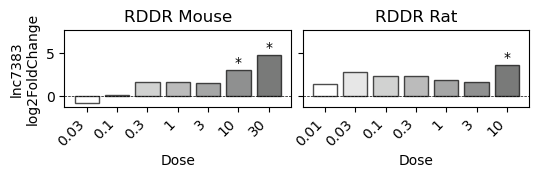

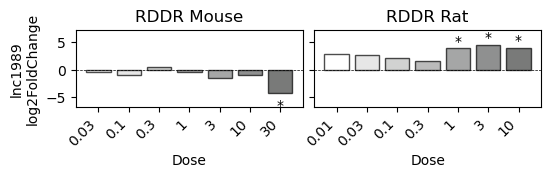

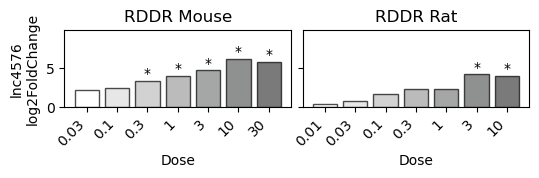

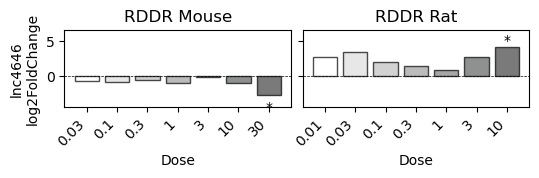

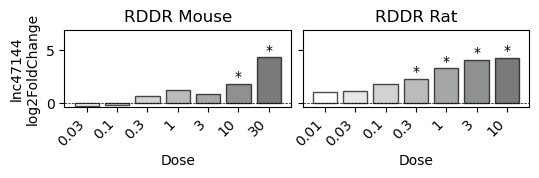

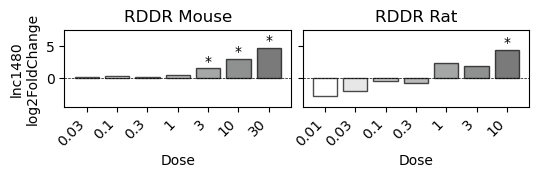

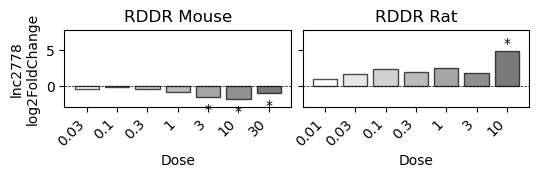

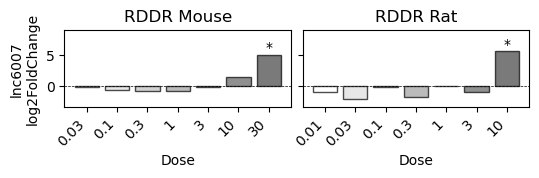

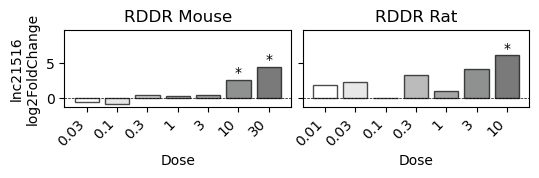

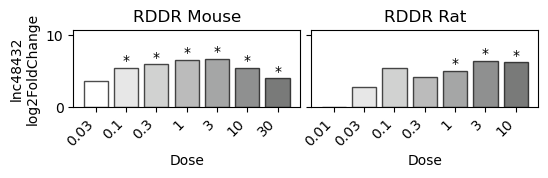

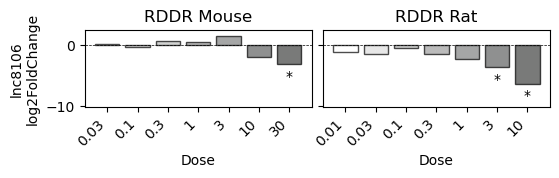

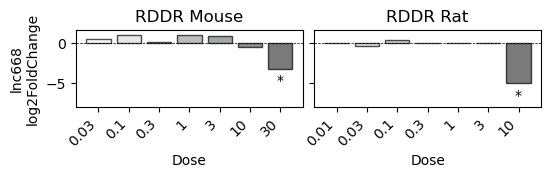

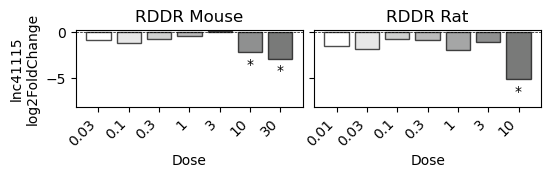

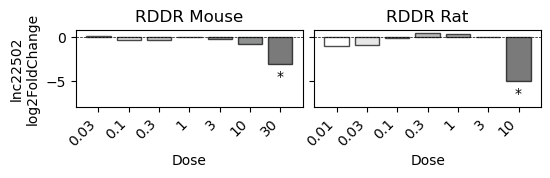

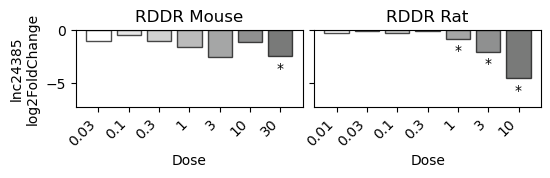

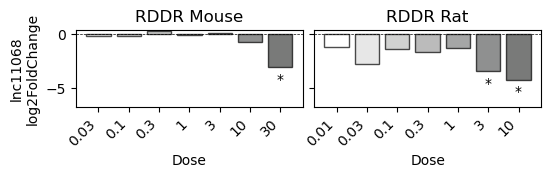

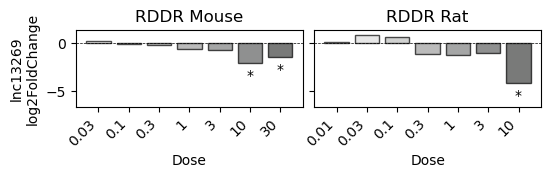

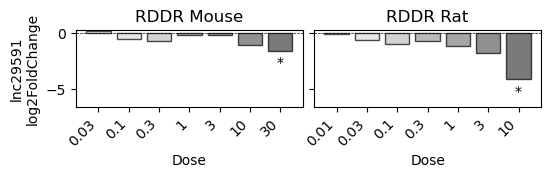

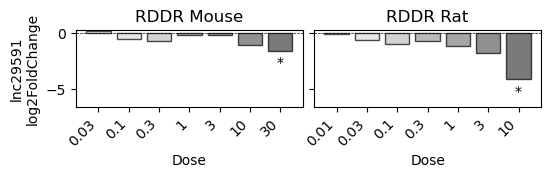

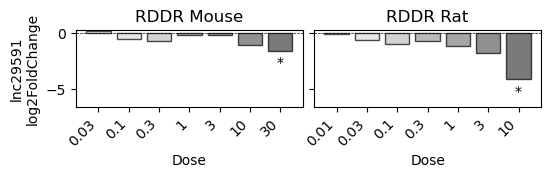

In [13]:
induced_eg = common_genes[['Gene','Log2FC_Mouse','padj_Mouse',
                           'Log2FC_Rat','padj_Rat']].sort_values(by='Log2FC_Rat')

top_10_genes = induced_eg.tail(10)['Gene']
bottom_10_genes = induced_eg.head(10)['Gene']


genes_of_interest = list(top_10_genes)

for gene_of_interest in genes_of_interest:
    plot_gene_of_interest(gene_of_interest, Mouse_Short, Rat_Short, mouse_doses_order, rat_doses_order, dose_colors)
    
genes_of_interest = list(bottom_10_genes)

for gene_of_interest in genes_of_interest:
    plot_gene_of_interest(gene_of_interest, Mouse_Short, Rat_Short, mouse_doses_order, rat_doses_order, dose_colors)

In [78]:
print(list(top_10_genes))
print(list(bottom_10_genes))

'lnc2169' 'lnc4576'

['lnc1989', 'lnc4576', 'lnc4646', 'lnc47144', 'lnc2778', 'lnc1480', 'lnc14916', 'lnc48432', 'lnc21516', 'lnc6007']
['lnc2169', 'lnc41115', 'lnc668', 'lnc24385', 'lnc13269', 'lnc11068', 'lnc8106', 'lnc15099', 'lnc39206', 'lnc12874']


In [83]:
top_10_genes

,Gene,Log2FC_Mouse,padj_Mouse,Log2FC_Rat,padj_Rat
136,lnc45640,-2.076955,8.750537e-05,2.331263,7.393807e-07
37,lnc1419,-1.856003,3.392719e-03,2.865580,2.225527e-03
147,lnc47600,-5.502792,1.492720e-04,2.898472,2.677803e-02
111,lnc3524,-2.863510,4.186980e-02,3.090596,2.364104e-02
0,lnc10070,-3.017909,1.589922e-02,3.339359,5.033818e-04
55,lnc15338,-1.757139,2.832029e-08,3.626267,3.076882e-06
64,lnc1989,-4.184033,9.715360e-04,3.972748,6.148703e-03
143,lnc4646,-2.975464,4.857481e-04,4.150283,1.330514e-03
90,lnc2778,-0.959984,2.057664e-02,4.373177,7.099782e-05
48,lnc14916,-1.768601,2.742609e-04,4.534790,3.837052e-09


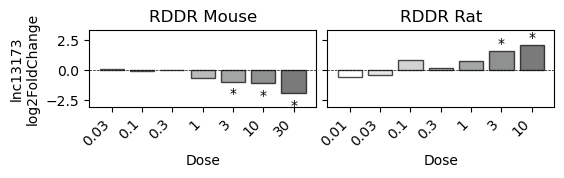

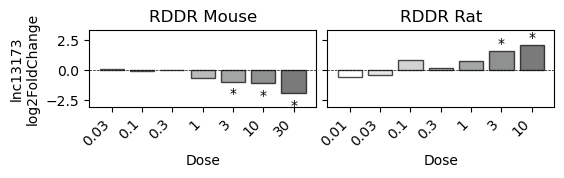

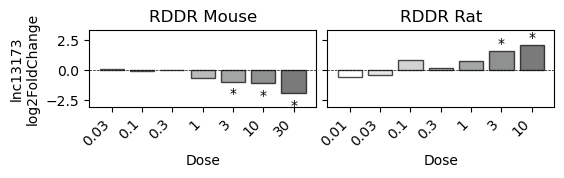

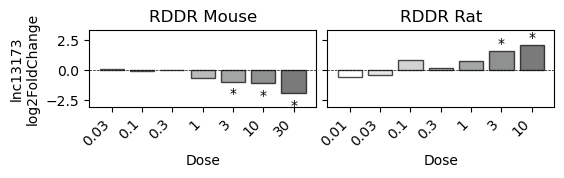

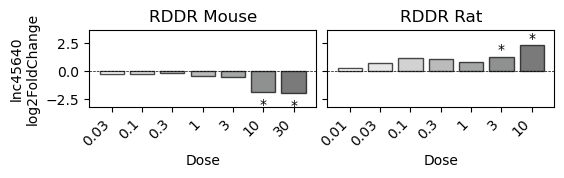

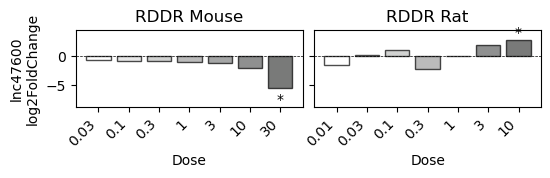

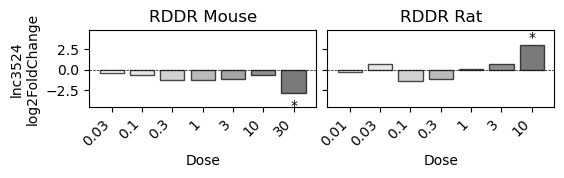

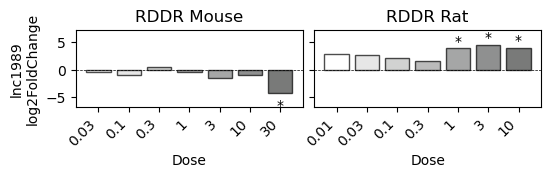

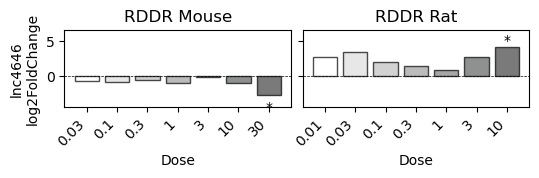

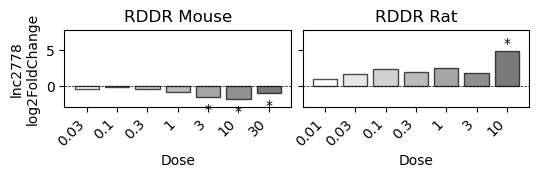

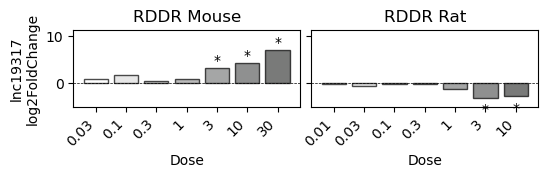

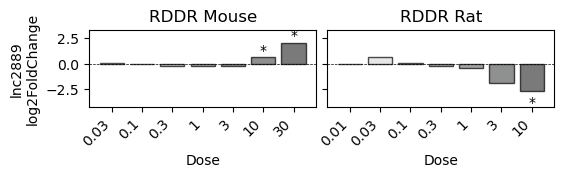

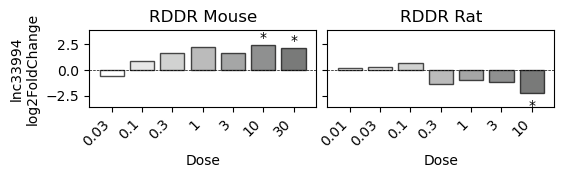

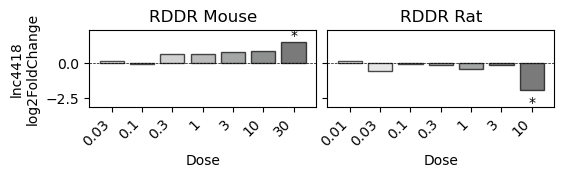

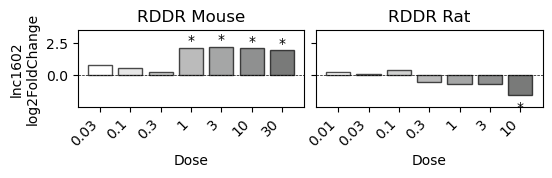

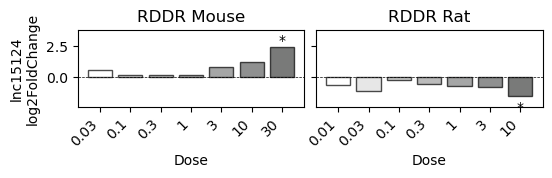

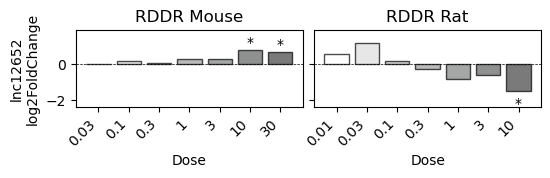

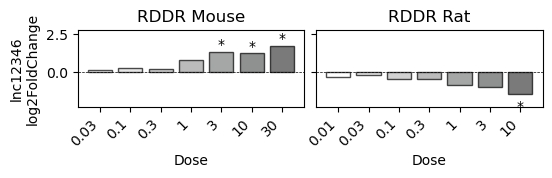

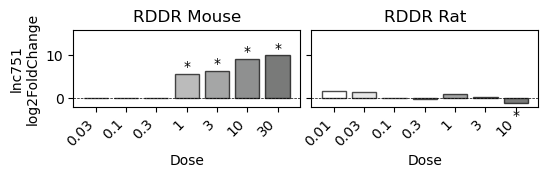

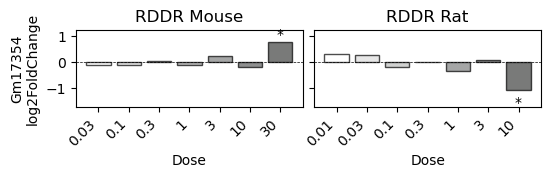

In [14]:
pos_neg = positive_negative_pairs[['Gene','Log2FC_Mouse','padj_Mouse',
                                   'Log2FC_Rat','padj_Rat']].sort_values(by='Log2FC_Rat')
top_10_genes = pos_neg.tail(10)['Gene']
bottom_10_genes = pos_neg.head(10)['Gene']

genes_of_interest = list(top_10_genes)

for gene_of_interest in genes_of_interest:
    plot_gene_of_interest(gene_of_interest, Mouse_Short, Rat_Short, mouse_doses_order, rat_doses_order, dose_colors)

genes_of_interest = list(bottom_10_genes)

for gene_of_interest in genes_of_interest:
    plot_gene_of_interest(gene_of_interest, Mouse_Short, Rat_Short, mouse_doses_order, rat_doses_order, dose_colors)


In [ ]:
lnc45640 lnc8927

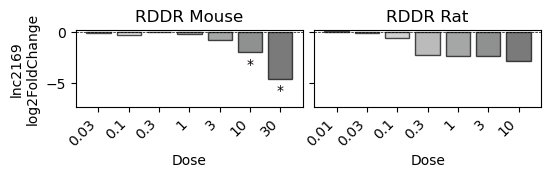

In [15]:
genes_of_interest = ['lnc2169']

for gene_of_interest in genes_of_interest:
    plot_gene_of_interest(gene_of_interest, Mouse_Short, Rat_Short, mouse_doses_order, rat_doses_order, dose_colors)
